<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-and-Load-Data" data-toc-modified-id="Import-and-Load-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import and Load Data</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#Trying-Out-Models" data-toc-modified-id="Trying-Out-Models-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Trying Out Models</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Support-Vector-Machine" data-toc-modified-id="Support-Vector-Machine-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Support Vector Machine</a></span></li><li><span><a href="#Decision-Trees-(Random-Forest,-Gradient-Boosting,-XGBoost)" data-toc-modified-id="Decision-Trees-(Random-Forest,-Gradient-Boosting,-XGBoost)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Decision Trees (Random Forest, Gradient Boosting, XGBoost)</a></span></li><li><span><a href="#Other-Models-(e.g.-Bagging-Classifier)" data-toc-modified-id="Other-Models-(e.g.-Bagging-Classifier)-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Other Models (e.g. Bagging Classifier)</a></span></li></ul></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model Evaluation</a></span></li></ul></div>

In [1]:
#from google.colab import drive
#drive.mount('/content/drive/')

## Import and Load Data

In [162]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.ensemble import GradientBoostingRegressor
import tensorflow as tf
from tensorflow import keras

from keras.datasets import mnist
from keras.layers import Dense, Flatten, Dropout
from keras.models import Sequential
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error


In [2]:
#!pip install xgboost

In [3]:
#load in your data

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
#df = pd.read_csv("/content/drive/MyDrive/product_info.csv", index_col=None)

In [54]:
df = pd.read_csv("product_info.csv", index_col=None)

In [55]:
df.shape

(8494, 27)

In [56]:
df.isna().sum()

product_id               0
product_name             0
brand_id                 0
brand_name               0
loves_count              0
rating                 278
reviews                278
size                  1631
variation_type        1444
variation_value       1598
variation_desc        7244
ingredients            945
price_usd                0
value_price_usd       8043
sale_price_usd        8224
limited_edition          0
new                      0
online_only              0
out_of_stock             0
sephora_exclusive        0
highlights            2207
primary_category         0
secondary_category       8
tertiary_category      990
child_count              0
child_max_price       5740
child_min_price       5740
dtype: int64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int64  
 16  new   

In [58]:
df.shape

(8494, 27)

array([[<Axes: title={'center': 'brand_id'}>,
        <Axes: title={'center': 'loves_count'}>,
        <Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'reviews'}>],
       [<Axes: title={'center': 'price_usd'}>,
        <Axes: title={'center': 'value_price_usd'}>,
        <Axes: title={'center': 'sale_price_usd'}>,
        <Axes: title={'center': 'limited_edition'}>],
       [<Axes: title={'center': 'new'}>,
        <Axes: title={'center': 'online_only'}>,
        <Axes: title={'center': 'out_of_stock'}>,
        <Axes: title={'center': 'sephora_exclusive'}>],
       [<Axes: title={'center': 'child_count'}>,
        <Axes: title={'center': 'child_max_price'}>,
        <Axes: title={'center': 'child_min_price'}>, <Axes: >]],
      dtype=object)

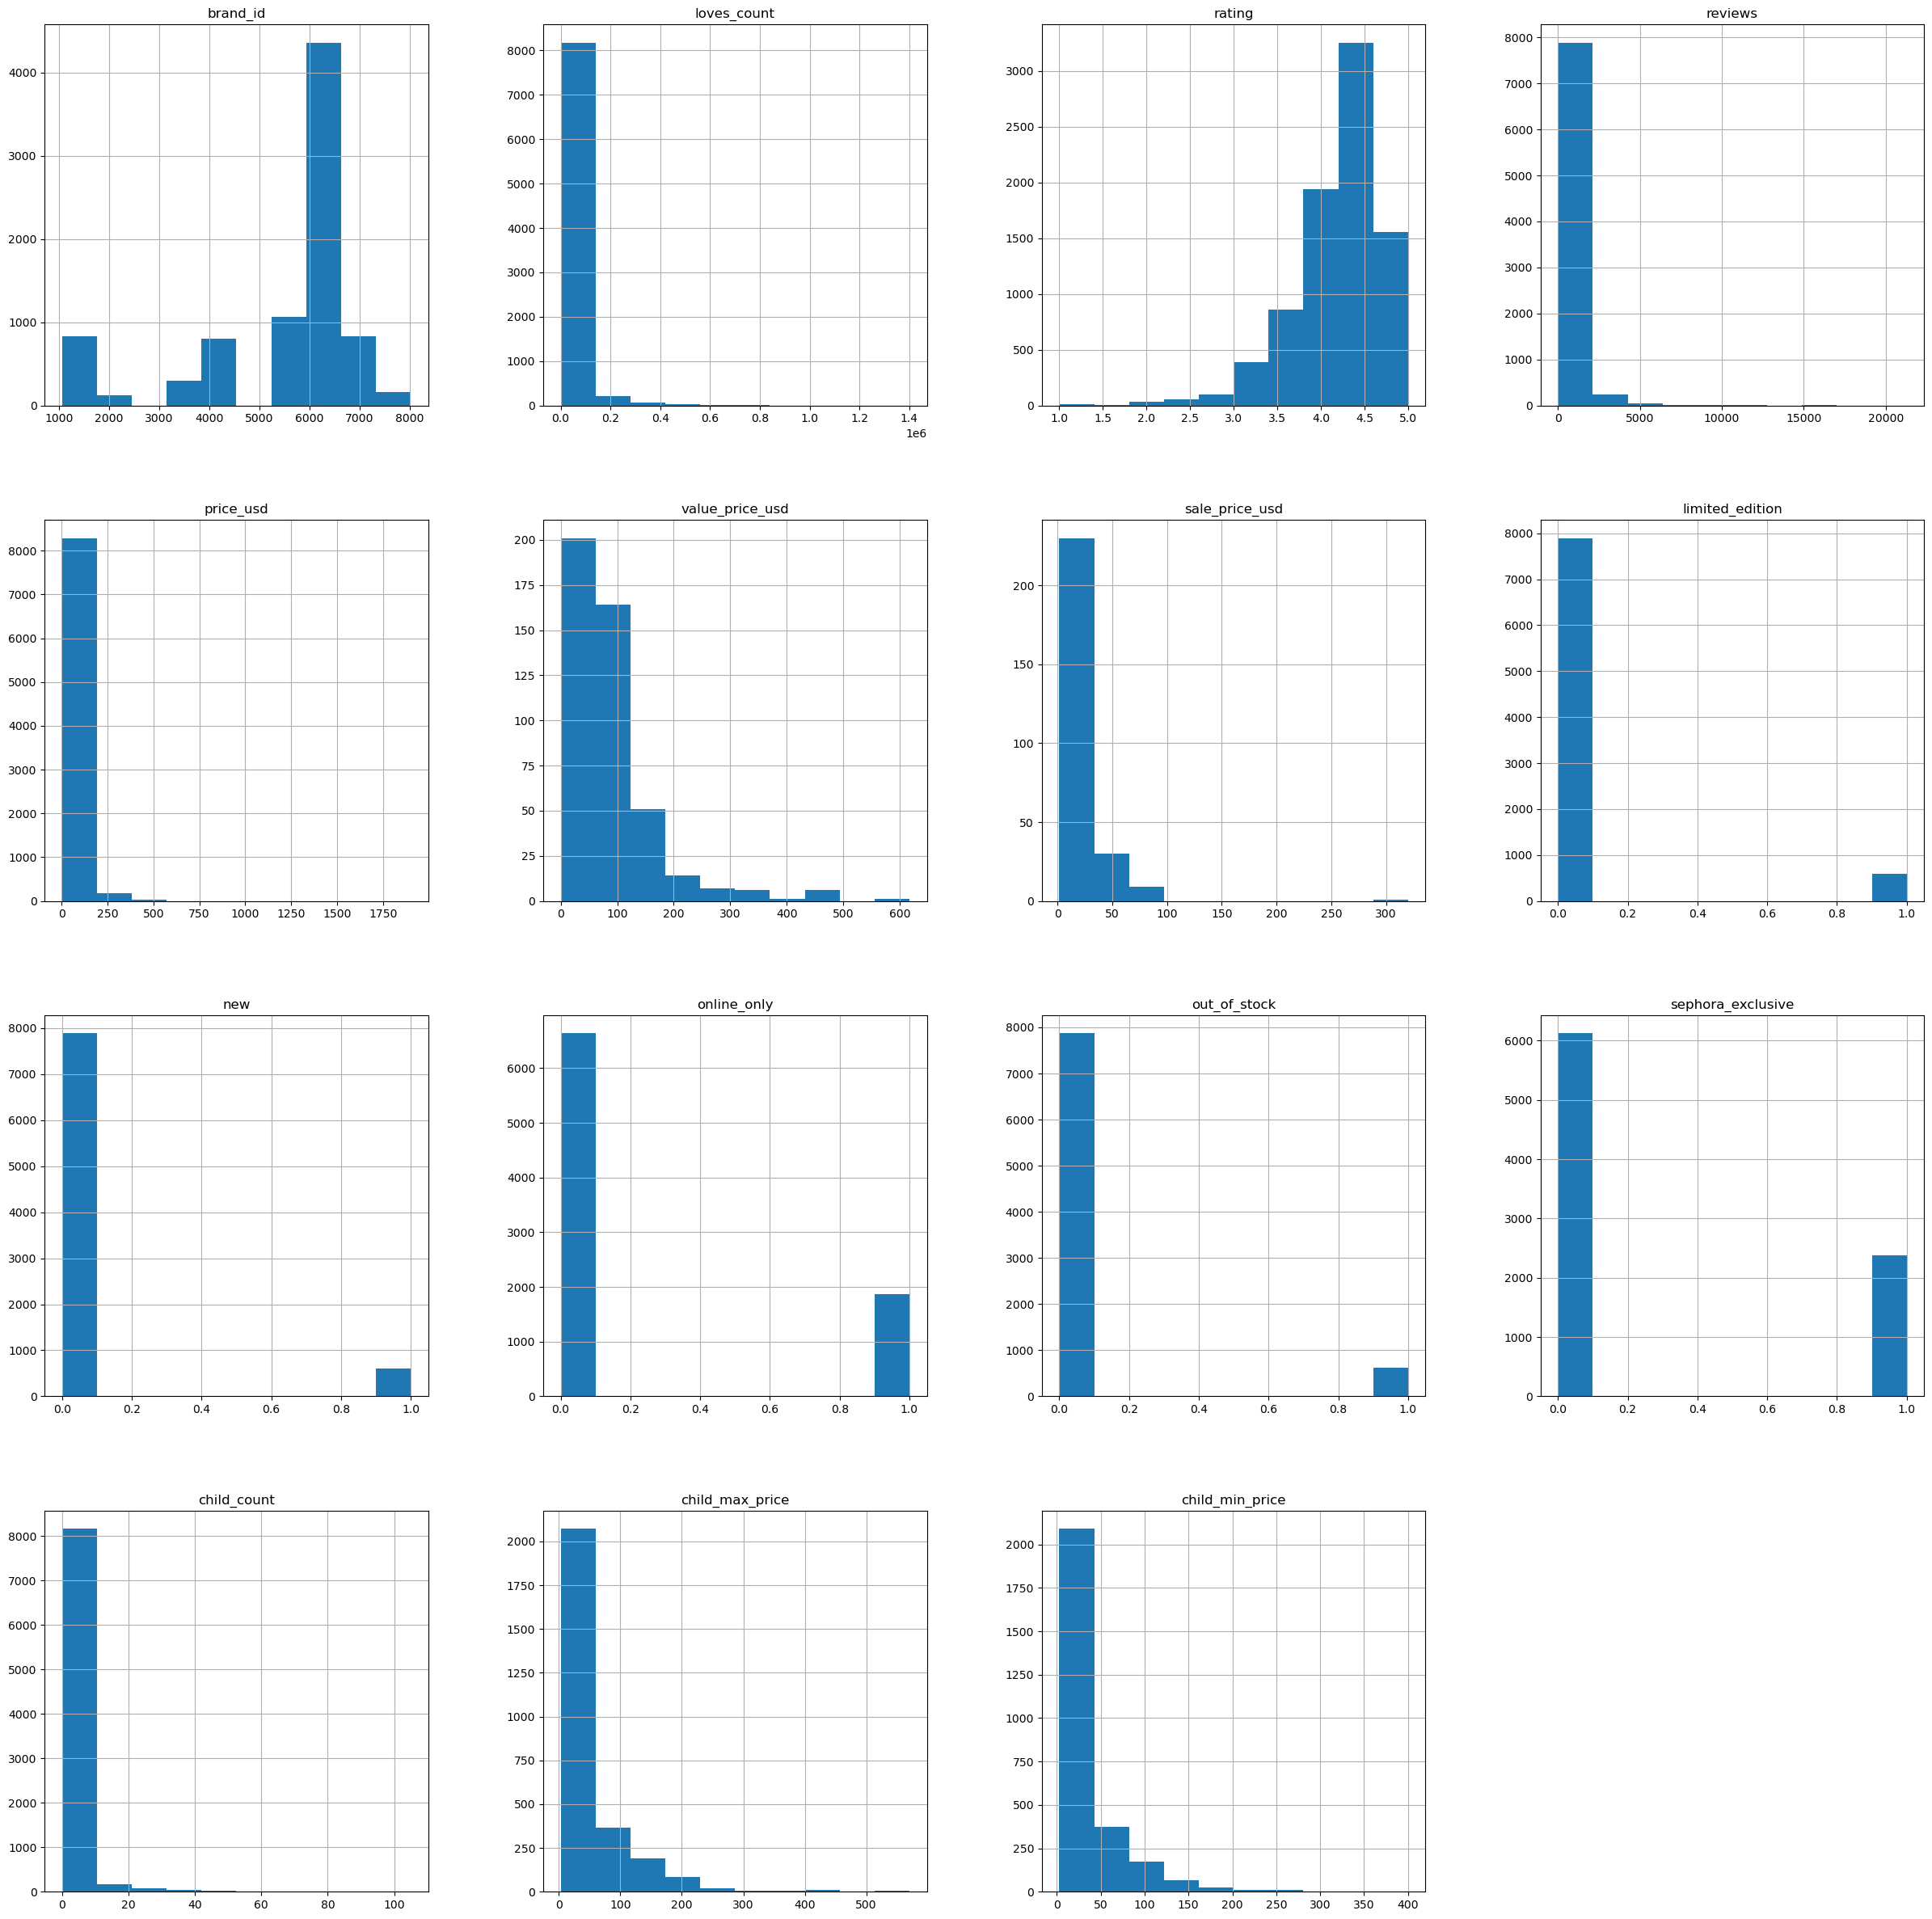

In [59]:
df.hist(figsize=[30,30])

In [60]:
df.describe()

,brand_id,loves_count,rating,reviews,price_usd,value_price_usd,sale_price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,child_count,child_max_price,child_min_price
count,8494.000000,8.494000e+03,8216.000000,8216.000000,8494.000000,451.000000,270.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,2754.000000,2754.000000
mean,5422.440546,2.917957e+04,4.194513,448.545521,51.655595,91.168537,20.207889,0.070285,0.071698,0.219096,0.073699,0.279374,1.631622,53.792023,39.665802
std,1709.595957,6.609212e+04,0.516694,1101.982529,53.669234,79.195631,24.327352,0.255642,0.258002,0.413658,0.261296,0.448718,5.379470,58.765894,38.685720
min,1063.000000,0.000000e+00,1.000000,1.000000,3.000000,0.000000,1.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000
25%,5333.000000,3.758000e+03,3.981725,26.000000,25.000000,45.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,19.000000
50%,6157.500000,9.880000e+03,4.289350,122.000000,35.000000,67.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,28.000000
75%,6328.000000,2.684125e+04,4.530525,418.000000,58.000000,108.500000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,59.000000,42.000000
max,8020.000000,1.401068e+06,5.000000,21281.000000,1900.000000,617.000000,320.000000,1.000000,1.000000,1.000000,1.000000,1.000000,105.000000,570.000000,400.000000


## Preprocessing

 - Handle missing values
 - Topic Modelling for the text based columns - ingredients, highlights, catergory, etc.
 - Encode categorical variables, scale data, feature selection.
 - Split the dataset into features (X) and target variable (y)
 - Split into training and testing sets

In [61]:
len(df.columns)

27

In [62]:
df.columns

Index(['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count',
       'rating', 'reviews', 'size', 'variation_type', 'variation_value',
       'variation_desc', 'ingredients', 'price_usd', 'value_price_usd',
       'sale_price_usd', 'limited_edition', 'new', 'online_only',
       'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'child_count',
       'child_max_price', 'child_min_price'],
      dtype='object')

In [63]:
df.isna().sum()[df.isna().sum()!=0]

rating                 278
reviews                278
size                  1631
variation_type        1444
variation_value       1598
variation_desc        7244
ingredients            945
value_price_usd       8043
sale_price_usd        8224
highlights            2207
secondary_category       8
tertiary_category      990
child_max_price       5740
child_min_price       5740
dtype: int64

Dropping columns with more than 50% of NaNs

In [64]:
threshold = len(df)* 0.5

In [65]:
df.dropna(thresh = threshold, axis = 1, inplace = True)

In [66]:
len(df.columns)

22

In [67]:
df.columns

Index(['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count',
       'rating', 'reviews', 'size', 'variation_type', 'variation_value',
       'ingredients', 'price_usd', 'limited_edition', 'new', 'online_only',
       'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'child_count'],
      dtype='object')

In [68]:
df.isna().sum()[df.isna().sum()!=0]

rating                 278
reviews                278
size                  1631
variation_type        1444
variation_value       1598
ingredients            945
highlights            2207
secondary_category       8
tertiary_category      990
dtype: int64

In [69]:
df.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,ingredients,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,"['Capri Eau de Parfum:', 'Alcohol Denat. (SD A...",35.0,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2


In [70]:
df.rating.nunique()

4394

Filling NaNs for rating with median value.

In [71]:
df['rating'].fillna(df['rating'].median(), inplace=True)

In [72]:
# Round ratings to the nearest 0.5 step
#df['rating'] = df['rating'].apply(lambda x: round(x * 2) / 2)
#tried this but there was no significant improvement

In [73]:
df.head(2)

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,ingredients,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,"['Capri Eau de Parfum:', 'Alcohol Denat. (SD A...",35.0,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2


In [74]:
df.rating.value_counts().head()

rating
4.28935    278
5.00000    256
4.00000    174
4.50000     82
4.33330     68
Name: count, dtype: int64

In [75]:
df.reviews.value_counts().head()    #changed to head() post checking whole list

reviews
2.0    144
4.0    134
3.0    124
1.0    124
6.0    124
Name: count, dtype: int64

In [76]:
# Filling NaN values with 0
df['reviews'].fillna(0, inplace=True)

In [77]:
df['size'].value_counts().head()

size
1.7 oz/ 50 mL     500
1 oz/ 30 mL       366
3.4 oz/ 100 mL    211
0.5 oz/ 15 mL     171
1.7 oz / 50 mL    124
Name: count, dtype: int64

In [78]:
df['size'].nunique()

2055

In [79]:
df['variation_value'].value_counts().head()

variation_value
1.7 oz/ 50 mL     374
1 oz/ 30 mL       302
0.5 oz/ 15 mL     147
3.4 oz/ 100 mL    128
1.7 oz / 50 mL     96
Name: count, dtype: int64

In [80]:
df[df['size'].isna()].head(2)

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,ingredients,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,"['Capri Eau de Parfum:', 'Alcohol Denat. (SD A...",35.0,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0
15,P476418,African Beauty Butter Mini Gift Set,6471,54 Thrones,7526,3.5610,41.0,NaN,NaN,NaN,"['Egyptian Lavender + Moroccan Mint:', 'Butyro...",29.0,0,0,1,1,1,"['Good for: Dryness', 'Clean at Sephora', 'Hyd...",Bath & Body,Value & Gift Sets,NaN,0


In [81]:
df['size'].unique()

array([nan, '3.4 oz/ 100 mL', '0.25 oz/ 7.5 mL', ..., '0.25 oz/ 7.5 ml',
       '2.6 oz', '.11 oz / 3.2 mL'], dtype=object)

In [82]:
df[df['size'].isna()]['secondary_category'].unique()

array(['Value & Gift Sets', 'Eye Care', 'Hair Styling & Treatments',
       'Face', 'Tools', 'Eye', 'Brushes & Applicators', 'Lip',
       'Makeup Palettes', 'Beauty Tools', 'Mini Size', 'Accessories',
       'Makeup', 'Cheek', 'Wellness', 'High Tech Tools', 'Sunscreen',
       'Candles & Home Scents', 'Shampoo & Conditioner',
       'Body Moisturizers', 'Women', 'Masks', 'Treatments', 'Skincare',
       'Hair Tools', 'Body Care', 'Nail', 'Cleansers',
       'Lip Balms & Treatments', 'Moisturizers', 'Beauty Accessories',
       'Shop by Concern', 'Shaving', 'Self Tanners', 'Bath & Shower',
       'Fragrance', nan], dtype=object)

In [83]:
df[df['size'].isna()]['primary_category'].unique()

array(['Fragrance', 'Bath & Body', 'Hair', 'Skincare', 'Makeup',
       'Tools & Brushes', 'Mini Size', 'Men', 'Gifts'], dtype=object)

Keeping the oz value for the size column.

In [84]:
def extract_ounces(size_str):
    if pd.isna(size_str):
        return np.nan
    # Find all occurrences of numbers followed by 'oz'
    matches = re.findall(r'(\d*\.?\d+)\s*oz', size_str, re.IGNORECASE)
    # Get the first match as a float
    return round(float(matches[0]), 2) if matches else np.nan

# Apply the function to the 'size' column to extract ounce values
df['size'] = df['size'].apply(extract_ounces)

In [85]:
median_oz = round(df['size'].median(), 2)

# Fill NaN values with the rounded median 'oz' value
df['size'].fillna(median_oz, inplace=True)

In [86]:
df.head(1)

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,ingredients,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,1.7,NaN,NaN,"['Capri Eau de Parfum:', 'Alcohol Denat. (SD A...",35.0,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0


In [87]:
df.isna().sum()[df.isna().sum()!=0]

variation_type        1444
variation_value       1598
ingredients            945
highlights            2207
secondary_category       8
tertiary_category      990
dtype: int64

In [88]:
df.variation_type.value_counts()

variation_type
Size                                  4043
Color                                 1700
Size + Concentration + Formulation    1173
Type                                    88
Scent                                   30
Size + Concentration                    11
Formulation                              5
Name: count, dtype: int64

In [89]:
threshold = 100

# Group variation types with counts below the threshold into 'Other'
value_counts = df['variation_type'].value_counts()
to_replace = value_counts[value_counts < threshold].index
df['variation_type'] = df['variation_type'].replace(to_replace, 'Other')

In [90]:
df.variation_type.value_counts()

variation_type
Size                                  4043
Color                                 1700
Size + Concentration + Formulation    1173
Other                                  134
Name: count, dtype: int64

In [91]:
df['variation_type'].fillna('Unknown', inplace=True)

In [92]:
df.variation_type.value_counts()

variation_type
Size                                  4043
Color                                 1700
Unknown                               1444
Size + Concentration + Formulation    1173
Other                                  134
Name: count, dtype: int64

Dropping variation_value as it is highly correlated to the size column.

In [93]:
df.drop(columns=['variation_value'], inplace = True)

In [94]:
df.isna().sum()[df.isna().sum()!=0]

ingredients            945
highlights            2207
secondary_category       8
tertiary_category      990
dtype: int64

In [95]:
df['ingredients'].fillna('Unknown', inplace=True)   

In [96]:
# Replace NaN values in 'highlights' with a list containing 'No Highlights'
df['highlights'].fillna('Unknown', inplace=True)

In [97]:
df.isna().sum()[df.isna().sum()!=0]

secondary_category      8
tertiary_category     990
dtype: int64

In [98]:
df = df.dropna(subset=['secondary_category'])

Filling NaNs for tertiary category by extracting data from "Product Name" column.

In [99]:
def fill_categories_from_product_name(product_names, categories):
    # Define a list of keywords to look for in product names
    keywords = ['cleanser', 'moisturizer', 'perfume', 'shampoo', 'spray', 'nail polish', 'balm',
               'mascara','brow pencil','primer','oil','conditioner','set','hair','gel','suncsreen','exfoliator',
                'kit','mask','primer','face wash','treatment','blush','cream','Highlighter','powder','serum',
               'contour','nail','toner','candle','concealer','exfoliant','sunscreen','tint']
    # Join keywords into a regex pattern
    pattern = '|'.join(keywords)

    # Function to search for keywords in the product name
    def find_keyword(product_name):
        match = re.search(pattern, product_name, re.IGNORECASE)
        return match.group(0) if match else "Unknown"

    # Apply the find_keyword function to fill NaN values
    filled_categories = categories.copy()  # Avoid modifying the original Series
    # For rows with NaN in categories, extract and use the keyword from product names
    condition = filled_categories.isna()
    filled_categories[condition] = product_names[condition].apply(find_keyword)

    return filled_categories

# Apply the function
df['tertiary_category'] = fill_categories_from_product_name(df['product_name'], df['tertiary_category'])

In [100]:
df.head(1)

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,ingredients,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,1.7,Unknown,"['Capri Eau de Parfum:', 'Alcohol Denat. (SD A...",35.0,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0


In [101]:
df.isna().any().any()

False

In [102]:
df.head(1)

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,ingredients,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,1.7,Unknown,"['Capri Eau de Parfum:', 'Alcohol Denat. (SD A...",35.0,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0


In [103]:
df.product_name.nunique()

8407

In [104]:
df.shape

(8486, 21)

Now, all the NaNs has been handled, lets check text based columns.

In [105]:
df.highlights.nunique()

4418

In [106]:
df.highlights.isna().sum()

0

In [107]:
df.head(1)

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,ingredients,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,1.7,Unknown,"['Capri Eau de Parfum:', 'Alcohol Denat. (SD A...",35.0,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0


In [108]:
df['product_id'] = df['product_id'].str.replace('P', '').astype(int)

In [110]:
df.head(2)

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,ingredients,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count
0,473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,1.7,Unknown,"['Capri Eau de Parfum:', 'Alcohol Denat. (SD A...",35.0,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0
1,473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4,Size + Concentration + Formulation,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2


In [111]:
df.isna().any()

product_id            False
product_name          False
brand_id              False
brand_name            False
loves_count           False
rating                False
reviews               False
size                  False
variation_type        False
ingredients           False
price_usd             False
limited_edition       False
new                   False
online_only           False
out_of_stock          False
sephora_exclusive     False
highlights            False
primary_category      False
secondary_category    False
tertiary_category     False
child_count           False
dtype: bool

**Topic Modelling** for ingredient column.
- Chosen num_topics as 80, post trying values - 20, 50, 100, 200 and checking their performance. 

In [112]:
import pandas as pd
from gensim import corpora
from gensim.models import LdaModel
from gensim.parsing.preprocessing import preprocess_string

# Assuming df is your DataFrame and 'ingredients' is the column containing ingredient lists
# Preprocess the ingredients column
df['cleaned_ingredients'] = df['ingredients'].apply(lambda x: preprocess_string(x))

# Create a dictionary and a document-term matrix
dictionary = corpora.Dictionary(df['cleaned_ingredients'])
doc_term_matrix = [dictionary.doc2bow(doc) for doc in df['cleaned_ingredients']]

# Apply LDA
num_topics = 80  # Specify the number of topics
lda_model = LdaModel(doc_term_matrix, num_topics=num_topics, id2word=dictionary, passes=20)

# Get the topics for each document
topics = lda_model.get_document_topics(doc_term_matrix)

# Assign the most relevant topic to each document
df['topic_ingredients'] = [max(t, key=lambda x: x[1])[0] for t in topics]

# Use the topics as features for predictive models
# For example, you can one-hot encode the topics or use them directly as features in your models


In [113]:
df.head(1)

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,ingredients,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,cleaned_ingredients,topic_ingredients
0,473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,1.7,Unknown,"['Capri Eau de Parfum:', 'Alcohol Denat. (SD A...",35.0,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,"[capri, eau, parfum, alcohol, denat, alcohol, ...",73


In [114]:
df.topic_ingredients.unique()

array([73, 78, 62,  0, 41, 40, 20, 16, 29, 55, 51,  4, 52, 77, 37, 27, 75,
       33,  8, 11, 65, 36, 43, 28, 48, 34,  2, 60,  3, 79, 64, 63,  6, 30,
       39, 22, 19, 53, 47, 49, 31, 58,  1, 23, 70, 14, 42, 26, 68, 35, 61,
       57, 69, 76,  7, 10, 74, 66, 13, 54, 21, 17, 32, 15, 44,  5, 50, 67,
       72, 59])

Topic Modelling for highlights column.

In [115]:
import pandas as pd
from gensim import corpora
from gensim.models import LdaModel
from gensim.parsing.preprocessing import preprocess_string

# Assuming df is your DataFrame and 'highlights' is the column containing highlight text
# Preprocess the highlights column
df['cleaned_highlights'] = df['highlights'].apply(lambda x: preprocess_string(x))

# Create a dictionary and a document-term matrix
dictionary = corpora.Dictionary(df['cleaned_highlights'])
doc_term_matrix = [dictionary.doc2bow(doc) for doc in df['cleaned_highlights']]

# Apply LDA
num_topics = 50  # Specify the number of topics
lda_model = LdaModel(doc_term_matrix, num_topics=num_topics, id2word=dictionary, passes=15)

# Get the topics for each document
topics = lda_model.get_document_topics(doc_term_matrix)

# Assign the most relevant topic to each document
df['highlight_topic'] = [max(t, key=lambda x: x[1])[0] for t in topics]

# Use the topics as features for predictive models
# For example, you can one-hot encode the topics or use them directly as features in your models


In [116]:
df.head(1)

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,ingredients,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,cleaned_ingredients,topic_ingredients,cleaned_highlights,highlight_topic
0,473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,1.7,Unknown,"['Capri Eau de Parfum:', 'Alcohol Denat. (SD A...",35.0,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,"[capri, eau, parfum, alcohol, denat, alcohol, ...",73,"[unisex, genderless, scent, warm, spici, scent...",30


Topic Modelling for tertiary-category column.

In [117]:
import pandas as pd
from gensim import corpora
from gensim.models import LdaModel
from gensim.parsing.preprocessing import preprocess_string

# Assuming df is your DataFrame and 'tertiary_category' is the column you're analyzing
df['cleaned_tertiary_category'] = df['tertiary_category'].apply(lambda x: preprocess_string(str(x)))

# Create a dictionary and a document-term matrix for the cleaned_tertiary_category
dictionary_tertiary = corpora.Dictionary(df['cleaned_tertiary_category'])
doc_term_matrix_tertiary = [dictionary_tertiary.doc2bow(doc) for doc in df['cleaned_tertiary_category']]

# Specify the number of topics for the LDA model
num_topics = 50

# Apply LDA to the tertiary_category
lda_model_tertiary = LdaModel(doc_term_matrix_tertiary, num_topics=num_topics, id2word=dictionary_tertiary, passes=25)

# Get the topics for each tertiary_category document
topics_tertiary = lda_model_tertiary.get_document_topics(doc_term_matrix_tertiary)

# Assign the most relevant topic to each document, handling empty topic lists
df['topic_tertiary_category'] = [max(t, key=lambda x: x[1])[0] if t else -1 for t in topics_tertiary]

# Now, df['topic_tertiary_category'] contains the most relevant topic number assigned to each document based on the tertiary_category


In [118]:
df.columns

Index(['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count',
       'rating', 'reviews', 'size', 'variation_type', 'ingredients',
       'price_usd', 'limited_edition', 'new', 'online_only', 'out_of_stock',
       'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'child_count',
       'cleaned_ingredients', 'topic_ingredients', 'cleaned_highlights',
       'highlight_topic', 'cleaned_tertiary_category',
       'topic_tertiary_category'],
      dtype='object')

In [119]:
df.drop(columns = [ 'product_name', 'brand_name','tertiary_category','cleaned_tertiary_category',
       'cleaned_ingredients', 'cleaned_highlights','ingredients','highlights'], inplace = True)
#dropping all the columns from which new columns are dervied or correlated ones.

In [120]:
df.head()

,product_id,brand_id,loves_count,rating,reviews,size,variation_type,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,primary_category,secondary_category,child_count,topic_ingredients,highlight_topic,topic_tertiary_category
0,473671,6342,6320,3.6364,11.0,1.7,Unknown,35.0,0,0,1,0,0,Fragrance,Value & Gift Sets,0,73,30,46
1,473668,6342,3827,4.1538,13.0,3.4,Size + Concentration + Formulation,195.0,0,0,1,0,0,Fragrance,Women,2,73,21,46
2,473662,6342,3253,4.2500,16.0,3.4,Size + Concentration + Formulation,195.0,0,0,1,0,0,Fragrance,Women,2,73,21,46
3,473660,6342,3018,4.4762,21.0,3.4,Size + Concentration + Formulation,195.0,0,0,1,0,0,Fragrance,Women,2,73,21,46
4,473658,6342,2691,3.2308,13.0,3.4,Size + Concentration + Formulation,195.0,0,0,1,0,0,Fragrance,Women,2,73,21,46


In [121]:
df.price_usd.max()

1900.0

In [122]:
df.price_usd.value_counts().head()

price_usd
30.0    347
32.0    312
25.0    294
20.0    282
28.0    265
Name: count, dtype: int64

In [123]:
df[df.price_usd==1900]

,product_id,brand_id,loves_count,rating,reviews,size,variation_type,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,primary_category,secondary_category,child_count,topic_ingredients,highlight_topic,topic_tertiary_category
6802,502216,6314,4154,3.75,4.0,1.7,Unknown,1900.0,0,0,1,0,1,Skincare,High Tech Tools,0,0,12,40


There is one outlier for our target, dropping that.

In [124]:
df = df[df['price_usd'] != 1900]

In [125]:
df.price_usd.max()

495.0

In [1]:
#Tried log transormation in another sheet, for target variable as it was skewed, didn't imporve the model much.
#May be transforning the whole dataset might have helped

#import numpy as np
#import pandas as pd

#Check for values that are <= 0, since log transformation can only be applied to positive values
#if (df['price_usd'] <= 0).any():
    # Add a small constant to avoid log(0) which is undefined
#df['log_price_usd'] = np.log(df['price_usd'] + 1)
#else:
    # Directly apply the log transformation
    #df['log_price_usd'] = np.log(df['price_usd'])

#Now df['log_price_usd'] is the log-transformed target variable

In [126]:
X = df.drop(columns = ['price_usd'], axis = 1)

In [133]:
X.shape

(8485, 18)

In [127]:
y = df['price_usd']

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

In [129]:
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'bool', 'category']).columns

In [130]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Scale numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'  # Leave remaining columns untouched
)

In [131]:
preprocessor_tree = ColumnTransformer(
    transformers=[
        #('num', StandardScaler(), numerical_cols),  # Scale numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'  # Leave remaining columns untouched
)

In [134]:
X_processed = preprocessor.fit_transform(X)

In [135]:
X_processed

array([[-0.0190692 ,  0.53715606, -0.34611374, ...,  1.        ,
         0.        ,  0.        ],
       [-0.01906922,  0.53715606, -0.383819  , ...,  0.        ,
         0.        ,  1.        ],
       [-0.01906927,  0.53715606, -0.39250044, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.01883545, -2.54725824, -0.41939171, ...,  1.        ,
         0.        ,  0.        ],
       [-0.0188353 , -2.54725824, -0.42899574, ...,  1.        ,
         0.        ,  0.        ],
       [-0.0188276 , -2.54725824, -0.43878126, ...,  0.        ,
         0.        ,  0.        ]])

In [136]:
X_processed.shape

(8485, 69)

In [137]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_processed)

In [138]:
pca.n_components_

20

In [139]:
pca.explained_variance_ratio_.sum()

0.9529837017935345

## Trying Models

**Linear Regression - GridSearchCV**

In [140]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

pipeline_EN = Pipeline([
    ('preprocessing', preprocessor),
    ('pca',PCA(n_components=0.95)),
    ('elasticnet', ElasticNet())
])

In [141]:
param_grid_EN = {
    'elasticnet__alpha': [0.001, 0.01, 0.1, 1],     # Example: Regularization strength
    'elasticnet__l1_ratio': [0.3, 0.5, 0.9, 1.0]  # Example: Mix ratio between L1 and L2
}

In [142]:
grid_search = GridSearchCV(pipeline_EN, param_grid_EN, cv=5, scoring = 'neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['product_id', 'brand_id', 'loves_count', 'rating', 'reviews', 'size',
       'limited_edition', 'new', 'online_only', 'out_of_stock',
       'sephora_exclusive', 'child_count', 'topic_ingredients',
       'highlight_topic', 'topic_tertia...
      dtype='object')),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['variation_type', 'primary_category', 'secondary_category'], dtype='object'))])),
                                       ('pca', PCA(n_components=0.95)),
                                       ('elasticnet', ElasticNet())]),
             param_grid={'elasticnet__alpha': [0.001, 0.01, 0.1, 1],
                         'elasticnet__l1_ratio': [0.3, 0.5, 0.9, 1.0]},
             scoring='neg_mean_squared_error')

In [143]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Predict using the best estimator from the grid search
y_pred = grid_search.best_estimator_.predict(X_test)

# Calculate MAE (Mean Absolute Error), which is also known as MAD (Mean Absolute Deviation)
mad_EN = mean_absolute_error(y_test, y_pred)

# Calculate RMSE (Root Mean Square Error)
rmse_EN = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate MAPE (Mean Absolute Percentage Error)
# Handle division by zero if y_test contains zero values
mape_EN = np.mean(np.abs((y_test - y_pred) / np.where(y_test != 0, y_test, 1))) * 100

# Calculate R² (Coefficient of Determination)
r2_EN = r2_score(y_test, y_pred)

# Print the best model parameters and evaluation metrics
print(f"Best model parameters: {grid_search.best_params_}")
print(f"RMSE: {rmse_EN}")
print(f"MAD: {mad_EN}")
print(f"MAPE: {mape_EN}")
print(f"R²: {r2_EN}")

Best model parameters: {'elasticnet__alpha': 0.01, 'elasticnet__l1_ratio': 0.5}
RMSE: 45.67657504265778
MAD: 26.877760398082113
MAPE: 77.32130350537565
R²: 0.19495337710112082


Linear Regression with Bagging

In [144]:
from sklearn.ensemble import BaggingRegressor

elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.9)

# Define the BaggingRegressor with ElasticNet as the base estimator
bagging_en = BaggingRegressor(base_estimator=elastic_net, n_estimators=10, random_state=42)

# Define your pipeline
pipeline_bagging_en = Pipeline([
    ('preprocessing', preprocessor),
    ('pca', pca),
    ('bagging_en', bagging_en)
])

In [145]:
pipeline_bagging_en.fit(X_train, y_train)

/Users/ritikaverma/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  Index(['product_id', 'brand_id', 'loves_count', 'rating', 'reviews', 'size',
       'limited_edition', 'new', 'online_only', 'out_of_stock',
       'sephora_exclusive', 'child_count', 'topic_ingredients',
       'highlight_topic', 'topic_tertiary_category'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['variation_type', 'primary_category', 'secondary_category'], dtype='object'))])),
                ('pca', PCA(n_components=0.95)),
                ('bagging_en',
                 BaggingRegressor(base_estimator=ElasticNet(alpha=0.01,
                                                            l1_ratio=0.9),
                                  random_state=42))])

In [146]:
from sklearn.model_selection import cross_val_score

rmse_scores = np.sqrt(-cross_val_score(pipeline_bagging_en, X_train, y_train, scoring='neg_mean_squared_error', cv=5))

# Print the mean and standard deviation of the RMSE scores
print("Mean RMSE:", np.mean(rmse_scores))

/Users/ritikaverma/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/ritikaverma/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/ritikaverma/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/ritikaverma/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mean RMSE: 43.75529231768562


/Users/ritikaverma/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


**Obervation-**
- RMSE is better without bagging. 
- Tried without PCA, the score is better with PCA and much faster as well.

**Random Forest**
- Checking important features contributing to the price.
- Checking RMSE and R2 score.

In [147]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=1000, random_state=0)

# Define the pipeline with feature selection
pipeline_forest = Pipeline([
    ('preprocessing', preprocessor_tree),
    ('forest', forest)
])

# Fit the pipeline to your training data
pipeline_forest.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['variation_type', 'primary_category', 'secondary_category'], dtype='object'))])),
                ('forest',
                 RandomForestRegressor(n_estimators=1000, random_state=0))])

In [148]:
# Calculate permutation importance
result = permutation_importance(pipeline_forest, X_train, y_train, n_repeats=10, random_state=42)
# Get feature importances
feature_importances = result.importances_mean

In [149]:
# Print feature importances
for i, importance in enumerate(feature_importances):
    print(f"Feature {i}: {importance}")

Feature 0: 0.14132229174295668
Feature 1: 0.1729900527235863
Feature 2: 0.22490856592681147
Feature 3: 0.066518746499417
Feature 4: 0.0810126445521971
Feature 5: 0.1322927507967791
Feature 6: 0.13998481649537098
Feature 7: 0.017898792112601446
Feature 8: 0.0009329101966972341
Feature 9: 0.020656111612089235
Feature 10: 0.00936429646077278
Feature 11: 0.013688493501988298
Feature 12: 0.3151180619250079
Feature 13: 0.3876201092871784
Feature 14: 0.08799459654491386
Feature 15: 0.03215688624154014
Feature 16: 0.07733406328458799
Feature 17: 0.28982106678354275


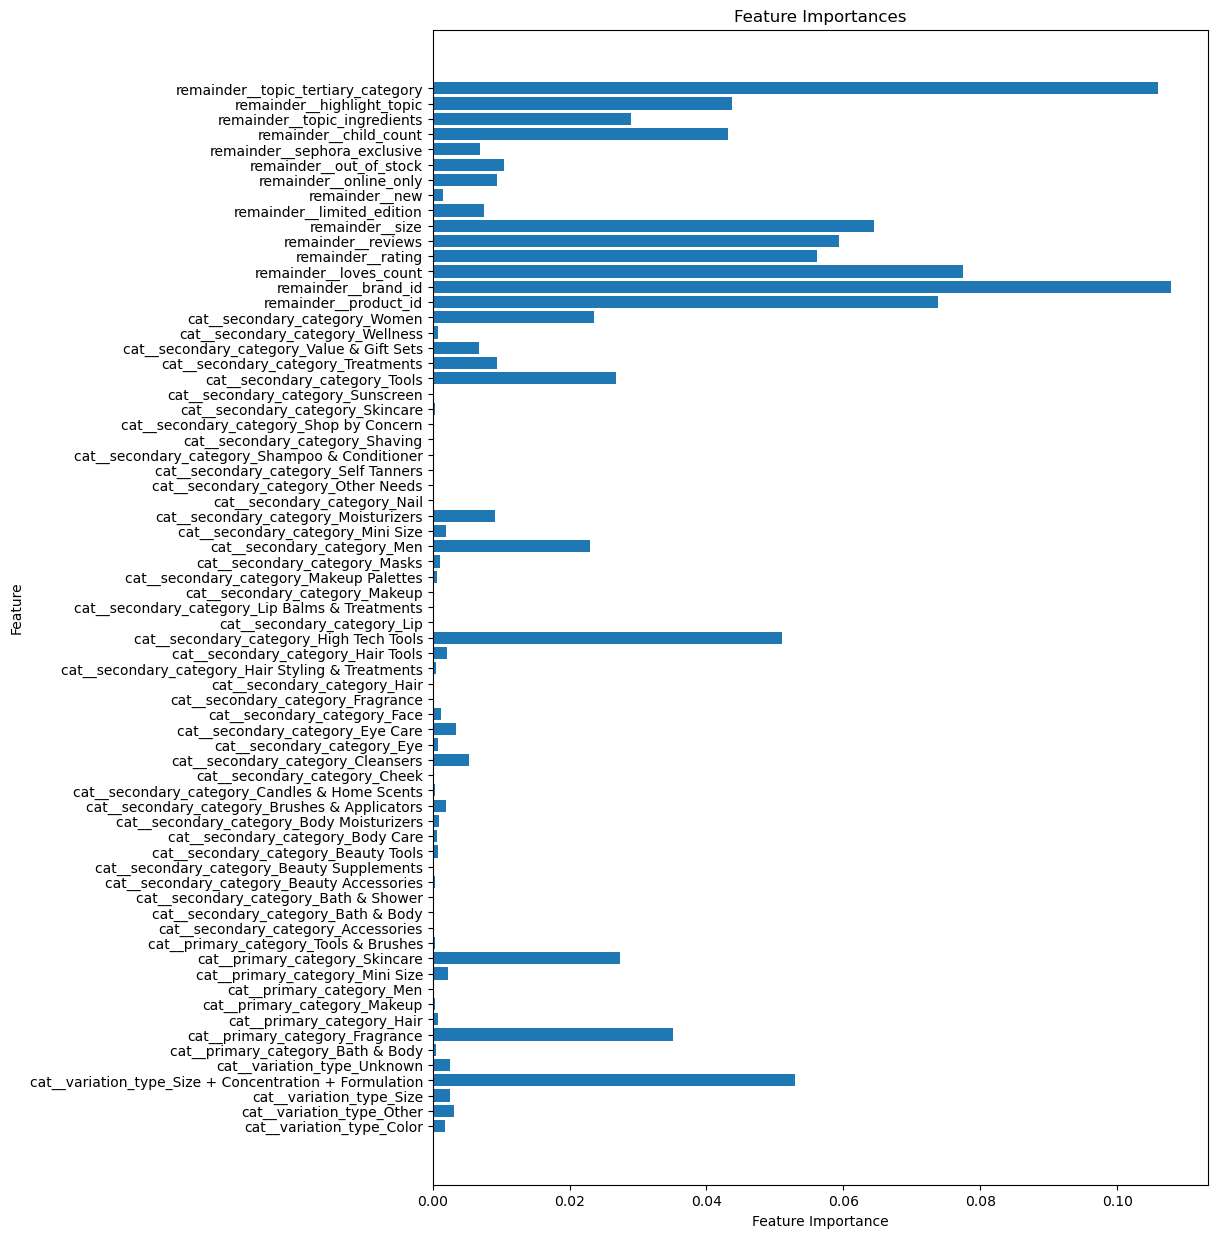

In [150]:
import matplotlib.pyplot as plt

feature_importances = pipeline_forest.named_steps['forest'].feature_importances_

# Get the column names after preprocessing
column_names_after_preprocessing = pipeline_forest.named_steps['preprocessing'].get_feature_names_out()

# Plot feature importances
plt.figure(figsize=(10, 15))
plt.barh(range(len(column_names_after_preprocessing)), feature_importances, align='center')
plt.yticks(range(len(column_names_after_preprocessing)), column_names_after_preprocessing)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

**Observation -**
Price for the product depends on the following:
- Product ID
- Brand ID
- Category the product belongs to
- if the product has review, love counts.

In [151]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Generate predictions using the pipeline that includes the random forest
y_pred = pipeline_forest.predict(X_test)

# Calculate MAE (Mean Absolute Error), which is also the Mean Absolute Deviation (MAD)
mad_RF = mean_absolute_error(y_test, y_pred)

# Calculate RMSE (Root Mean Square Error)
rmse_RF = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate MAPE (Mean Absolute Percentage Error)
# Handle division by zero if y_test contains zero values
mape_RF = np.mean(np.abs((y_test - y_pred) / np.where(y_test != 0, y_test, 1))) * 100

# Calculate R² (Coefficient of Determination)
r2_RF = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"RMSE with random forest: {rmse_RF}")
print(f"MAD with random forest: {mad_RF}")
print(f"MAPE with random forest: {mape_RF}")
print(f"R² with random forest: {r2_RF}")


RMSE with random forest: 31.07027273794732
MAD with random forest: 16.387157955215088
MAPE with random forest: 44.180797030732805
R² with random forest: 0.6275018673645176


**Obervation-**
- We are getting better r2 and RMSE is reduced as well with random forest.

**Gradient Boosting Regressor**

In [152]:
gbrt = GradientBoostingRegressor(n_iter_no_change=5, tol=0.02, random_state=42)

# Simplified parameter grid
param_grid_grbt = {
    'gbrt__n_estimators': [300,400,500],       #tried other params in different combination - 700,800, 1000.
    'gbrt__learning_rate': [0.01, 0.1,0.2],    
    'gbrt__max_depth': [3, 4,6]
}

# Pipeline with potential adjustments (e.g., reconsidered PCA)
pipeline_gbrt = Pipeline([
    ('preprocessing', preprocessor_tree),
    ('gbrt', gbrt)
])

In [153]:
grid_search_gbrt = GridSearchCV(pipeline_gbrt, param_grid_grbt, cv=5,scoring = 'neg_mean_squared_error',n_jobs = -1)
grid_search_gbrt.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['variation_type', 'primary_category', 'secondary_category'], dtype='object'))])),
                                       ('gbrt',
                                        GradientBoostingRegressor(n_iter_no_change=5,
                                                                  random_state=42,
                                                                  tol=0.02))]),
             n_jobs=-1,
             param_grid={'gbrt__learning_rate': [0.01, 0.1, 0.2],
                         'gbrt__max_depth': [3, 4, 6],
                         'gbrt__n_estimators': [300, 400, 500]},
             scoring='neg_mean_squared_error')

In [154]:
grid_search_gbrt.best_params_

{'gbrt__learning_rate': 0.2, 'gbrt__max_depth': 6, 'gbrt__n_estimators': 300}

In [155]:
y_pred_gbrt = grid_search_gbrt.best_estimator_.predict(X_test)

# Calculate MAE - Mean Absolute Error (also known as MAD)
mae_gbrt = mean_absolute_error(y_test, y_pred_gbrt)

# Calculate RMSE - Root Mean Square Error
rmse_gbrt = np.sqrt(mean_squared_error(y_test, y_pred_gbrt))

# Calculate R² - the coefficient of determination
r2_gbrt = r2_score(y_test, y_pred_gbrt)

# Calculate MAPE - Mean Absolute Percentage Error
mape_gbrt = np.mean(np.abs((y_test - y_pred_gbrt) / y_test)) * 100

# Print the best model parameters and evaluation metrics
print(f"Best model parameters: {grid_search_gbrt.best_params_}")
print(f"RMSE: {rmse_gbrt}")
print(f"R²: {r2_gbrt}")
print(f"MAD: {mae_gbrt}")
print(f"MAPE: {mape_gbrt}")


Best model parameters: {'gbrt__learning_rate': 0.2, 'gbrt__max_depth': 6, 'gbrt__n_estimators': 300}
RMSE: 31.09355314479933
R²: 0.6269434456856124
MAD: 16.924547250301966
MAPE: 43.04409179511453


**XGB Regressor**

With RandomizedSearchCV

In [156]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
xg_reg = xgb.XGBRegressor()

param_grid_xgb = {
    'xgb__n_estimators': [100, 500,800],
    'xgb__learning_rate': [0.01, 0.1],
    'xgb__max_depth': [6, 10],
    'xgb__subsample': [0.8, 1.0,1.5],
    'xgb__gamma': [0, 0.1],  # Added regularization parameter
    'xgb__reg_alpha': [0, 0.1]  # Added L1 regularization parameter
}


# Define the pipeline
pipeline_xgb = Pipeline([
    ('preprocessing', preprocessor_tree),
    ('xgb', xg_reg)
])

# Use RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(pipeline_xgb, param_distributions=param_grid_xgb, 
                                       n_iter=10, cv=5, scoring='neg_mean_squared_error', 
                                       n_jobs=-1, verbose=1, random_state=42)

In [157]:
random_search_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/ritikaverma/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/ritikaverma/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ritikaverma/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ritikaverma/anaconda3/lib/python3.11/site-packages/sklearn/

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('cat',
                                                                               OneHotEncoder(handle_unknown='ignore',
                                                                                             sparse_output=False),
                                                                               Index(['variation_type', 'primary_category', 'secondary_category'], dtype='object'))])),
                                             ('xgb',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample_by...
                                                           multi_strategy=None,
                                                           n_estimators=None,
                                                           n_jobs=None,
                                                           num_parallel_tree=None,
                                                           random_state=None, ...))]),
                   n_jobs=-1,
                   param_distributions={'xgb__gamma': [0, 0.1],
                                        'xgb__learning_rate': [0.01, 0.1],
                                        'xgb__max_depth': [6, 10],
                                        'xgb__n_estimators': [100, 500, 800],
                                        'xgb__reg_alpha': [0, 0.1],
                                        'xgb__subsample': [0.8, 1.0, 1.5]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [166]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Make predictions using the best estimator from the XGBoost model
y_pred_xgb = random_search_xgb.best_estimator_.predict(X_test)

# Calculate R² - the coefficient of determination
r2_xgb = r2_score(y_test, y_pred_xgb)

# Calculate RMSE - Root Mean Square Error
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

# Calculate MSE - Mean Squared Error
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

# Calculate MAD - Mean Absolute Deviation (or Error)
mad_xgb = mean_absolute_error(y_test, y_pred_xgb)

# Calculate MAPE - Mean Absolute Percentage Error
# Note: MAPE can be undefined if y_test contains zeros and should be treated with caution
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)

# Print the evaluation metrics
print(f"R² for XGBoost model: {r2_xgb}")
print(f"MSE for XGBoost model: {mse_xgb}")
print(f"RMSE for XGBoost model: {rmse_xgb}")
print(f"MAD for XGBoost model: {mad_xgb}")
print(f"MAPE for XGBoost model: {mape_xgb}")



R² for XGBoost model: 0.702138571177634
MSE for XGBoost model: 771.9342305008835
RMSE for XGBoost model: 27.783704405656266
MAD for XGBoost model: 14.958018596657038
MAPE for XGBoost model: 0.37546596702385515


In [158]:
random_search_xgb.best_params_

{'xgb__subsample': 0.8,
 'xgb__reg_alpha': 0.1,
 'xgb__n_estimators': 500,
 'xgb__max_depth': 6,
 'xgb__learning_rate': 0.1,
 'xgb__gamma': 0.1}

Exploring further on other hyperparameters in details on jupyter as XGBoost shows promising results so far.

In [159]:

from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
xg_reg = xgb.XGBRegressor()

param_grid_xgb_finetune = {
    'xgb__n_estimators': [475, 500, 525],  # Slight adjustments around 500
    'xgb__learning_rate': [0.08, 0.1, 0.12],  # Exploring around 0.1
    'xgb__max_depth': [5, 6, 7],  # One level deeper and shallower
    'xgb__subsample': [0.75, 0.8, 0.85],  # Small adjustments around 0.8
    'xgb__gamma': [0, 0.1, 0.2],  # Further explore gamma around 0.1
    'xgb__reg_alpha': [0, 0.05, 0.1]  # Explore slight increases in L1 regularization
}



# Define the pipeline
pipeline_xgb = Pipeline([
    ('preprocessing', preprocessor_tree),
    ('xgb', xg_reg)
])

# Use RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(pipeline_xgb, param_distributions=param_grid_xgb_finetune, 
                                       n_iter=10, cv=5, scoring='neg_mean_squared_error', 
                                       n_jobs=-1, verbose=1, random_state=42)

In [160]:
random_search_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('cat',
                                                                               OneHotEncoder(handle_unknown='ignore',
                                                                                             sparse_output=False),
                                                                               Index(['variation_type', 'primary_category', 'secondary_category'], dtype='object'))])),
                                             ('xgb',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample_by...
                                                           n_estimators=None,
                                                           n_jobs=None,
                                                           num_parallel_tree=None,
                                                           random_state=None, ...))]),
                   n_jobs=-1,
                   param_distributions={'xgb__gamma': [0, 0.1, 0.2],
                                        'xgb__learning_rate': [0.08, 0.1, 0.12],
                                        'xgb__max_depth': [5, 6, 7],
                                        'xgb__n_estimators': [475, 500, 525],
                                        'xgb__reg_alpha': [0, 0.05, 0.1],
                                        'xgb__subsample': [0.75, 0.8, 0.85]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [163]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming y_test is already defined and random_search_xgb is your fitted RandomizedSearchCV object

# Predict the test set using the best estimator found by RandomizedSearchCV
y_pred_xgb = random_search_xgb.best_estimator_.predict(X_test)

# Calculate R² - the coefficient of determination
r2_xgb1 = r2_score(y_test, y_pred_xgb)

# Calculate RMSE - Root Mean Square Error
rmse_xgb1 = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

# Calculate MSE - Mean Squared Error
mse_xgb1 = mean_squared_error(y_test, y_pred_xgb)

# Calculate MAD - Mean Absolute Deviation (or Error)
mad_xgb1 = mean_absolute_error(y_test, y_pred_xgb)

# Calculate MAPE - Mean Absolute Percentage Error
# Note: MAPE can be undefined if y_test contains zeros and should be treated with caution
mape_xgb1 = mean_absolute_percentage_error(y_test, y_pred_xgb)

# Print the evaluation metrics
print(f"R² for XGBoost model: {r2_xgb1}")
print(f"MSE for XGBoost model: {mse_xgb1}")
print(f"RMSE for XGBoost model: {rmse_xgb1}")
print(f"MAD for XGBoost model: {mad_xgb1}")
print(f"MAPE for XGBoost model: {mape_xgb1}")

R² for XGBoost model: 0.6962659452841287
MSE for XGBoost model: 787.1536597772603
RMSE for XGBoost model: 28.05625883430042
MAD for XGBoost model: 14.730455753159791
MAPE for XGBoost model: 0.3627792343510216


In [164]:
random_search_xgb.best_params_

{'xgb__subsample': 0.85,
 'xgb__reg_alpha': 0,
 'xgb__n_estimators': 475,
 'xgb__max_depth': 6,
 'xgb__learning_rate': 0.08,
 'xgb__gamma': 0.2}

Trying randomized search with few more hyperparameters

In [165]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
xg_reg = xgb.XGBRegressor()

param_grid_xgb_extended = {
    'xgb__n_estimators': [450, 475, 500],  # Slight tweak around your best
    'xgb__learning_rate': [0.075, 0.08, 0.085],  # Narrowing down around 0.08
    'xgb__max_depth': [5, 6, 7],  # Exploring around depth 6
    'xgb__subsample': [0.8, 0.85, 0.9],  # Adjusting around your best subsample
    'xgb__gamma': [0.15, 0.2, 0.25],  # Fine-tuning around gamma 0.2
    'xgb__reg_alpha': [0, 0.05],  # Given reg_alpha at 0 was best, testing slight increase
    'xgb__colsample_bytree': [0.6, 0.7, 0.8],  # New parameter
    'xgb__colsample_bylevel': [0.6, 0.7, 0.8],  # New parameter
    'xgb__min_child_weight': [1, 2, 3],  # New parameter
}

# Define the pipeline
pipeline_xgb = Pipeline([
    ('preprocessing', preprocessor),
    ('xgb', xg_reg)
])

# Use RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(pipeline_xgb, param_distributions=param_grid_xgb_extended , 
                                       n_iter=10, cv=5, scoring='neg_mean_squared_error', 
                                       n_jobs=-1, verbose=1, random_state=42)

In [166]:
random_search_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               StandardScaler(),
                                                                               Index(['product_id', 'brand_id', 'loves_count', 'rating', 'reviews', 'size',
       'limited_edition', 'new', 'online_only', 'out_of_stock',
       'sephora_exclusive', 'child_count', 'topic_ingredients',
       'highlight_topic', 'topic_...
                   param_distributions={'xgb__colsample_bylevel': [0.6, 0.7,
                                                                   0.8],
                                        'xgb__colsample_bytree': [0.6, 0.7,
                                                                  0.8],
                                        'xgb__gamma': [0.15, 0.2, 0.25],
                                        'xgb__learning_rate': [0.075, 0.08,
                                                               0.085],
                                        'xgb__max_depth': [5, 6, 7],
                                        'xgb__min_child_weight': [1, 2, 3],
                                        'xgb__n_estimators': [450, 475, 500],
                                        'xgb__reg_alpha': [0, 0.05],
                                        'xgb__subsample': [0.8, 0.85, 0.9]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [168]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming y_test is already defined and random_search_xgb is your fitted RandomizedSearchCV object

# Predict the test set using the best estimator found by RandomizedSearchCV
y_pred_xgb = random_search_xgb.best_estimator_.predict(X_test)

# Calculate R² - the coefficient of determination
r2_xgb3 = r2_score(y_test, y_pred_xgb)

# Calculate RMSE - Root Mean Square Error
rmse_xgb3 = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

# Calculate MSE - Mean Squared Error
mse_xgb3 = mean_squared_error(y_test, y_pred_xgb)

# Calculate MAD - Mean Absolute Deviation (or Error)
mad_xgb3 = mean_absolute_error(y_test, y_pred_xgb)

# Calculate MAPE - Mean Absolute Percentage Error
# Note: MAPE can be undefined if y_test contains zeros and should be treated with caution
mape_xgb3 = mean_absolute_percentage_error(y_test, y_pred_xgb)

# Print the evaluation metrics
print(f"R² for XGBoost model: {r2_xgb3}")
print(f"MSE for XGBoost model: {mse_xgb3}")
print(f"RMSE for XGBoost model: {rmse_xgb3}")
print(f"MAD for XGBoost model: {mad_xgb3}")
print(f"MAPE for XGBoost model: {mape_xgb3}")

R² for XGBoost model: 0.7064074747113087
MSE for XGBoost model: 760.8709895254467
RMSE for XGBoost model: 27.583890036132445
MAD for XGBoost model: 14.950047616298296
MAPE for XGBoost model: 0.3711555756462372


**Observation-**
- Best model so far is XGBoost wth rmse of 27 and r2 70.

**Support Vector Regressor**

In [169]:
from sklearn.svm import SVR
svr_reg = SVR()

# Define the grid of hyperparameters to search
param_grid_svr = {
    'svr__C': [0.1, 1, 10,100],
    'svr__kernel': ['linear', 'rbf', 'poly'],
    'svr__gamma': ['scale', 'auto']
}

# Create pipeline
pipeline_svr = Pipeline([
    ('preprocessing', preprocessor),  
    ('pca', PCA(n_components=0.95)),  
    ('svr', svr_reg)
])

In [170]:
# Perform grid search using cross-validation
grid_search_svr = GridSearchCV(pipeline_svr, param_grid_svr, cv=5, scoring='neg_mean_squared_error')

In [171]:
grid_search_svr.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['product_id', 'brand_id', 'loves_count', 'rating', 'reviews', 'size',
       'limited_edition', 'new', 'online_only', 'out_of_stock',
       'sephora_exclusive', 'child_count', 'topic_ingredients',
       'highlight_topic', 'topic_tertia...
      dtype='object')),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['variation_type', 'primary_category', 'secondary_category'], dtype='object'))])),
                                       ('pca', PCA(n_components=0.95)),
                                       ('svr', SVR())]),
             param_grid={'svr__C': [0.1, 1, 10, 100],
                         'svr__gamma': ['scale', 'auto'],
                         'svr__kernel': ['linear', 'rbf', 'poly']},
             scoring='neg_mean_squared_error')

In [172]:
# Assuming y_pred_svr are the predictions from the SVR model
y_pred_svr = grid_search_svr.best_estimator_.predict(X_test)

# Calculate MAE (Mean Absolute Error), which is also known as MAD (Mean Absolute Deviation)
mad_svr = mean_absolute_error(y_test, y_pred_svr)

# Calculate MSE (Mean Squared Error)
mse_svr = mean_squared_error(y_test, y_pred_svr)

# Calculate RMSE (Root Mean Square Error)
rmse_svr = np.sqrt(mse_svr)

# Calculate MAPE (Mean Absolute Percentage Error)
# We avoid division by zero by using np.where to replace zeros in y_test with a small number (e.g., 1e-10)
mape_svr = np.mean(np.abs((y_test - y_pred_svr) / np.where(y_test != 0, y_test, 1e-10))) * 100

# Calculate R² (Coefficient of Determination)
r2_svr = r2_score(y_test, y_pred_svr)

# Print the evaluation metrics
print(f"R² for SVR model: {r2_svr}")
print(f"MSE for SVR model: {mse_svr}")
print(f"RMSE for SVR model: {rmse_svr}")
print(f"MAD for SVR model: {mad_svr}")
print(f"MAPE for SVR model: {mape_svr}")


R² for SVR model: 0.27117712141550576
MSE for SVR model: 1888.8089343285765
RMSE for SVR model: 43.460429523056675
MAD for SVR model: 20.82802968355423
MAPE for SVR model: 46.22292274781884


SVR works similarly like linear regression.

### Neural Network Regressor

####  Relu activation

In [173]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

Splitting data in train,test and validation set.

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

In [175]:
X_train_processed = preprocessor.fit_transform(X_train)
X_valid_processed = preprocessor.transform(X_valid)
X_test_processed = preprocessor.transform(X_test)


In [176]:
X_train_processed.shape

(5430, 69)

In [177]:
X_valid_processed.shape

(1358, 69)

In [178]:
X_test_processed.shape

(1697, 69)

In [179]:
norm_layer = tf.keras.layers.Normalization(input_shape=X_train_processed.shape[1:])
norm_layer.adapt(X_train_processed)

# Define the model architecture
#Tried batch normalization & dropout
#Already tried with different layers and learning rate, this seemed to be performing the best of all

model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(200, activation="relu"),
    tf.keras.layers.Dense(200, activation="relu"),
    tf.keras.layers.Dense(200, activation="relu"),
    tf.keras.layers.Dense(200, activation="relu"),
    tf.keras.layers.Dense(200, activation="relu"),
    tf.keras.layers.Dense(200, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])


In [180]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 69)                139       
 on)                                                             
                                                                 
 dense (Dense)               (None, 200)               14000     
                                                                 
 dense_1 (Dense)             (None, 200)               40200     
                                                                 
 dense_2 (Dense)             (None, 200)               40200     
                                                                 
 dense_3 (Dense)             (None, 200)               40200     
                                                                 
 dense_4 (Dense)             (None, 200)               40200     
                                                        

In [181]:
# Fit the model
history = model.fit(X_train_processed, y_train, epochs=30,
                    validation_data=(X_valid_processed, y_valid))

Epoch 1/30
170/170 [==============================] - 1s 2ms/step - loss: 1995.2760 - root_mean_squared_error: 44.6685 - val_loss: 1868.5129 - val_root_mean_squared_error: 43.2263
Epoch 2/30
170/170 [==============================] - 0s 2ms/step - loss: 1603.0302 - root_mean_squared_error: 40.0379 - val_loss: 1724.1053 - val_root_mean_squared_error: 41.5223
Epoch 3/30
170/170 [==============================] - 0s 2ms/step - loss: 1481.5784 - root_mean_squared_error: 38.4913 - val_loss: 1615.0070 - val_root_mean_squared_error: 40.1871
Epoch 4/30
170/170 [==============================] - 0s 2ms/step - loss: 1382.1865 - root_mean_squared_error: 37.1778 - val_loss: 1574.7736 - val_root_mean_squared_error: 39.6834
Epoch 5/30
170/170 [==============================] - 0s 2ms/step - loss: 1297.0287 - root_mean_squared_error: 36.0143 - val_loss: 1554.7537 - val_root_mean_squared_error: 39.4304
Epoch 6/30
170/170 [==============================] - 0s 2ms/step - loss: 1228.4993 - root_mean_squa

In [182]:
mse_test, rmse_test = model.evaluate(X_test_processed, y_test)

54/54 [==============================] - 0s 684us/step - loss: 1602.5055 - root_mean_squared_error: 40.0313


In [183]:
rmse_test

40.031307220458984

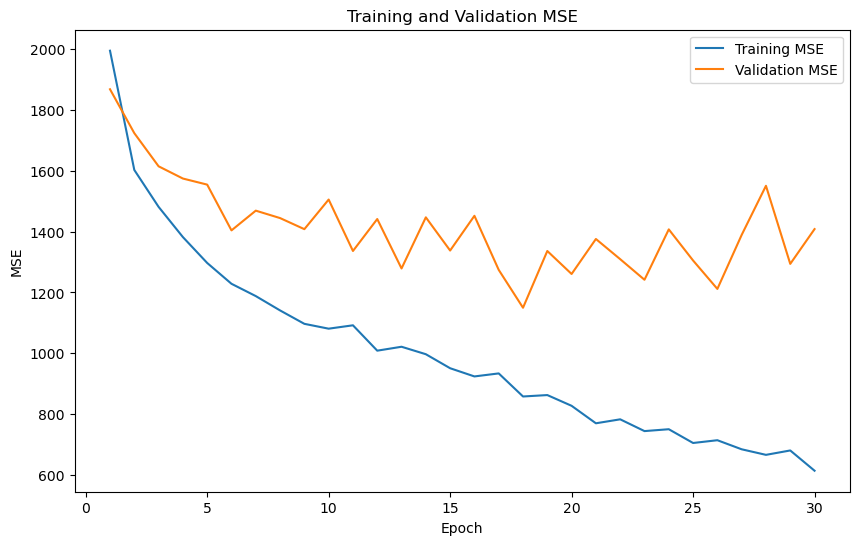

In [184]:
import matplotlib.pyplot as plt

# Extracting MSE loss for training and validation from the history object
train_mse = history.history['loss']
val_mse = history.history['val_loss']

epochs = range(1, 31)  # Adjust based on the number of epochs you've trained for

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_mse, label='Training MSE')
plt.plot(epochs, val_mse, label='Validation MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()


**Obervation-**
- The model with differnt learning rates, different number of layers does not perform better than XGBoost.
- MSE score shows the model might be overfitting as MSE is drastically reducing with increasing epochs, but validation MSE not so much.

### LeakyReLU

In [185]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

leaky_relu = tf.keras.layers.LeakyReLU(alpha=0.4)

# Define the normalization layer
norm_layer = tf.keras.layers.Normalization(input_shape=X_train_processed.shape[1:])
norm_layer.adapt(X_train_processed)

# Define the model architecture
model_lr = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(200, activation=leaky_relu),
    tf.keras.layers.Dense(200, activation=leaky_relu),
    tf.keras.layers.Dense(200, activation=leaky_relu),
    tf.keras.layers.Dense(200, activation=leaky_relu),
    tf.keras.layers.Dense(200, activation=leaky_relu),
    tf.keras.layers.Dense(200, activation=leaky_relu),
    tf.keras.layers.Dense(200, activation=leaky_relu),
    tf.keras.layers.Dense(200, activation=leaky_relu),
    tf.keras.layers.Dense(1)
])

In [186]:
model_lr.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 69)                139       
 on)                                                             
                                                                 
 dense (Dense)               (None, 200)               14000     
                                                                 
 dense_1 (Dense)             (None, 200)               40200     
                                                                 
 dense_2 (Dense)             (None, 200)               40200     
                                                                 
 dense_3 (Dense)             (None, 200)               40200     
                                                                 
 dense_4 (Dense)             (None, 200)               40200     
                                                        

In [187]:
# Compile the model
scheduler = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.00005, decay_steps=100, decay_rate=0.96, staircase=True)
optimizer = tf.keras.optimizers.Adam(learning_rate = scheduler)
model_lr.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

In [188]:
history_lr = model_lr.fit(X_train_processed, y_train, epochs=30,
                    validation_data=(X_valid_processed, y_valid))

Epoch 1/30
170/170 [==============================] - 1s 3ms/step - loss: 3366.1145 - root_mean_squared_error: 58.0182 - val_loss: 2171.1929 - val_root_mean_squared_error: 46.5961
Epoch 2/30
170/170 [==============================] - 1s 3ms/step - loss: 1836.2850 - root_mean_squared_error: 42.8519 - val_loss: 1967.4775 - val_root_mean_squared_error: 44.3563
Epoch 3/30
170/170 [==============================] - 1s 3ms/step - loss: 1690.7184 - root_mean_squared_error: 41.1183 - val_loss: 1907.6414 - val_root_mean_squared_error: 43.6766
Epoch 4/30
170/170 [==============================] - 1s 3ms/step - loss: 1638.3458 - root_mean_squared_error: 40.4765 - val_loss: 1898.0532 - val_root_mean_squared_error: 43.5667
Epoch 5/30
170/170 [==============================] - 1s 3ms/step - loss: 1612.6256 - root_mean_squared_error: 40.1575 - val_loss: 1889.1633 - val_root_mean_squared_error: 43.4645
Epoch 6/30
170/170 [==============================] - 1s 3ms/step - loss: 1595.6967 - root_mean_squa

In [189]:
mse_test_lr, rmse_test_lr = model_lr.evaluate(X_test_processed, y_test)

54/54 [==============================] - 0s 787us/step - loss: 1684.0043 - root_mean_squared_error: 41.0366


In [190]:
rmse_test_lr

41.03662109375

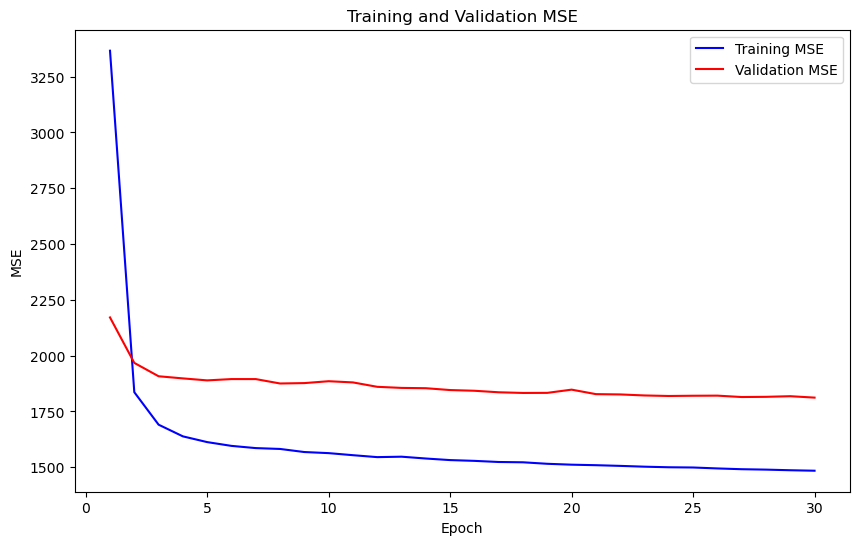

In [191]:
import matplotlib.pyplot as plt

# Extracting loss (MSE) for training and validation from the history object
train_mse_lr = history_lr.history['loss']
val_mse_lr = history_lr.history['val_loss']

epochs_lr = range(1, 31)  # Assuming you trained for 30 epochs

plt.figure(figsize=(10, 6))
plt.plot(epochs_lr, train_mse_lr, 'b-', label='Training MSE')
plt.plot(epochs_lr, val_mse_lr, 'r-', label='Validation MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()


In [192]:
# Evaluate the model on test data
mse_test_lr = model_lr.evaluate(X_test_processed, y_test)[0]  # Assuming the first return value is MSE

# Calculate RMSE from the MSE
rmse_test_lr = np.sqrt(mse_test_lr)

print(f"Test RMSE for Model: {rmse_test_lr}")


54/54 [==============================] - 0s 790us/step - loss: 1684.0043 - root_mean_squared_error: 41.0366
Test RMSE for Model: 41.036621114084646


**Obervation-**
- The model with differnt learning rates, different number of layers does not perform better than XGBoost.
- the model shows a good fit as the training and validation errors decrease and stabilize without a significant gap between them. This indicates that the model is learning from the training data and generalizing well to unseen data without overfitting.
- LeakyReLU performs better than ReLU.

### Model Comparision

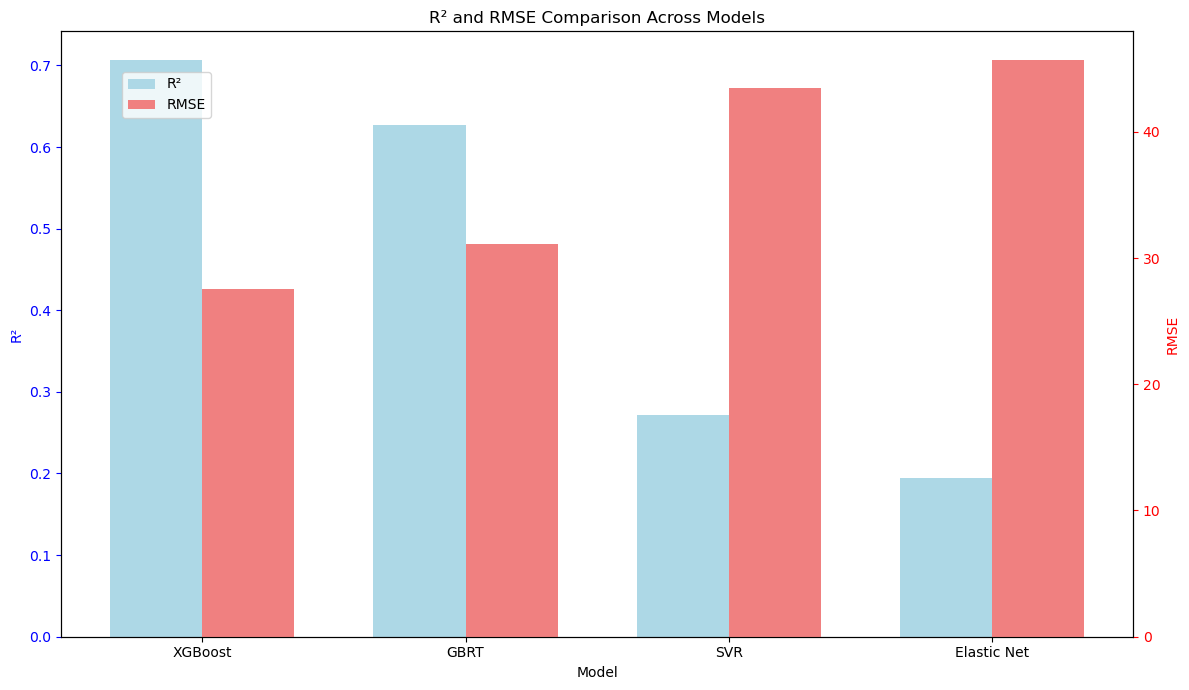

In [197]:
# Updated metrics to include Elastic Net (EN)
r2_scores = [r2_xgb3, r2_gbrt, r2_svr, r2_EN]  # Add R² for Elastic Net
rmse_scores = [rmse_xgb3, rmse_gbrt, rmse_svr, rmse_EN]  # Add RMSE for Elastic Net

# Updated model names to include Elastic Net
model_names = ['XGBoost', 'GBRT', 'SVR', 'Elastic Net']

index = np.arange(len(model_names))
bar_width = 0.35

fig, ax1 = plt.subplots(figsize=(12, 7))

# Bars for R² with light blue color
bars1 = ax1.bar(index, r2_scores, bar_width, label='R²', color='lightblue')

# Configure the first y-axis
ax1.set_xlabel('Model')
ax1.set_ylabel('R²', color='blue')
ax1.tick_params('y', colors='blue')
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(model_names)

# Second y-axis for RMSE
ax2 = ax1.twinx()
bars2 = ax2.bar(index + bar_width, rmse_scores, bar_width, label='RMSE', color='lightcoral')

# Configure the second y-axis
ax2.set_ylabel('RMSE', color='red')
ax2.tick_params('y', colors='red')

# Title and legend
plt.title('R² and RMSE Comparison Across Models')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Show plot with tight layout
plt.tight_layout()
plt.show()

## Price Regression Conclusion

**XGBoostRegressor works best for our dataset with the chosen preprocessing.**

- In the development of our skincare recommendation system, various machine learning models were evaluated for their effectiveness in price regression. 
- The key metrics considered for this comparison were the **R²** value, which measures the proportion of variance in the dependent variable that can be predicted from the independent variable(s), and the **RMSE**, which provides a measure of the differences between values predicted by the model and the actual values.

**Incorporating Feature Importance in Skincare Price Regression**

An analysis of feature importances in our machine learning model further strengthens the decision to select XGBoost for the price regression task. These findings are integral to our price regression model as they guide us in feature engineering and model refinement. By focusing on the most influential factors, we can streamline our model to operate more efficiently and with greater accuracy. 

Given the high R² and low RMSE, XGBoost is selected for the final implementation in the skincare recommendation system. The benefits of utilizing XGBoost include:

* **Model Accuracy**: XGBoost provides a robust predictive performance, which is essential for giving accurate price estimates in the recommendation system. Accurate price predictions are critical for customer trust and satisfaction.

* **Consistency**: The high R² value indicates consistent performance across the dataset, which is crucial for maintaining the reliability of the skincare recommendation system across different user inputs and product ranges.

* **Business Impact**: By integrating XGBoost into our recommendation system, we expect to enhance the user experience by providing precise price estimates that customers can use to make informed purchasing decisions. This can lead to increased sales, customer retention, and a stronger market position due to the improved quality of our recommendations.

* **Scalability**: XGBoost is known for handling large datasets efficiently, allowing our recommendation system to scale as our product inventory grows, without a significant loss in performance.